In [1]:
import numpy as np
from UZ_utils import *
import cv2
from matplotlib import pyplot as plt
import os

# Exercise 1

### a

In [2]:
def myhist3(arr, n):
    min = np.min(arr)
    max = np.max(arr)
    diff = max - min
    shape = arr.shape
    arr = arr.reshape((shape[0] * shape[1], 3)) # reshaping into one dimensional image with 3 channels (2D (w*h)*3)
    arr = ((arr.astype(np.float64) - min) / diff) * (n)
    arr = arr.astype(np.uint8)
    arr[arr == n] = n-1 # max value is n (n goes into n-1 bin)
    counts = np.zeros((n, n, n))
    for pixel in arr:
        counts[pixel[2], pixel[1], pixel[0]] += 1
    
    return counts / len(arr) # normalizing

### b 

In [3]:
def compare_histograms(hist1, hist2, method):
    hist1 = hist1.reshape(-1) # turn histograms in 1D array
    hist2 = hist2.reshape(-1)
    if method == "L2":
        print("L2")
        return np.sqrt(np.sum((hist1 - hist2) * (hist1 - hist2)))
    elif method == "x^2":
        print("x^2")
        return 0.5 * np.sum(((hist1 - hist2) ** 2) / (hist1 + hist2 + 1.0e-10))
    elif method == "I":
        print("I")
        return 1 - np.sum(np.minimum(hist1, hist2))
    elif method == "H":
        print("H")
        return np.sqrt(0.5 * np.sum((np.sqrt(hist1) - np.sqrt(hist2)) ** 2))
    else:
        print("Method not implemented")

### c

In [4]:
obj1_1 = cv2.imread('dataset/object_01_1.png') # 0-255
obj1_1 = cv2.cvtColor(obj1_1, cv2.COLOR_BGR2RGB)
obj2_1 = cv2.imread('dataset/object_02_1.png') # 0-255
obj2_1 = cv2.cvtColor(obj2_1, cv2.COLOR_BGR2RGB)
obj3_1 = cv2.imread('dataset/object_03_1.png') # 0-255
obj3_1 = cv2.cvtColor(obj3_1, cv2.COLOR_BGR2RGB)

n_bins = 8
hist1 = myhist3(obj1_1, n_bins)
hist2 = myhist3(obj2_1, n_bins)
hist3 = myhist3(obj3_1, n_bins)
hist1 = hist1.reshape(-1)
hist2 = hist2.reshape(-1)
hist3 = hist3.reshape(-1)

In [5]:
value1 = compare_histograms(hist1, hist1, "L2")
print(value1)
value2 = compare_histograms(hist1, hist2, "L2")
print(value2)
value3 = compare_histograms(hist1, hist3, "L2")
print(value3)
# value = compare_histograms(hist1, hist2, "L2")
# print(value)
# value = compare_histograms(hist1, hist2, "x^2")
# print(value)
# value = compare_histograms(hist1, hist2, "I")
# print(value)
# value = compare_histograms(hist1, hist2, "H")
# print(value)

L2
0.0
L2
0.4262689894140761
L2
0.09658762854854758


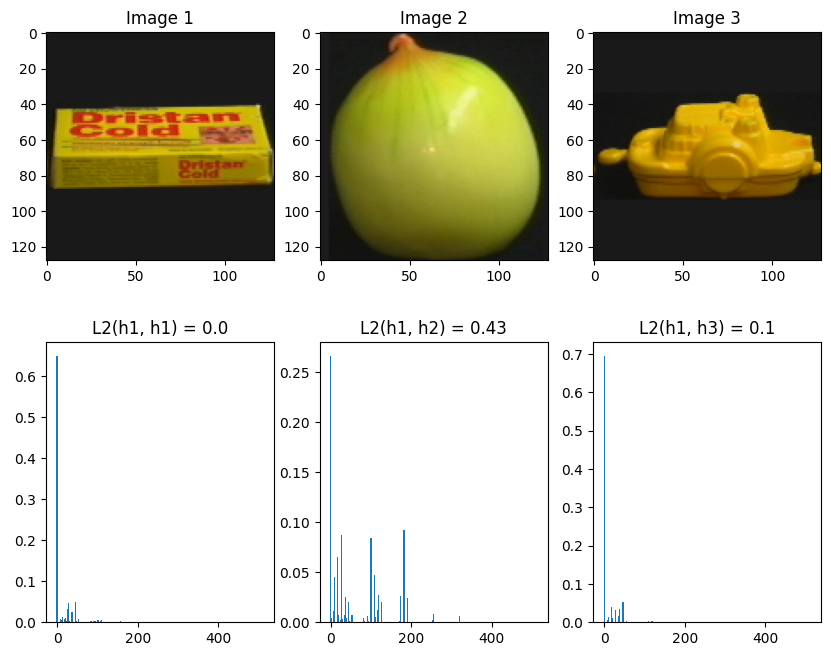

In [6]:
f = plt.figure(figsize=(10, 8))
f.add_subplot(2, 3, 1)
plt.imshow(obj1_1)
plt.title("Image 1")
f.add_subplot(2, 3, 2)
plt.imshow(obj2_1)
plt.title("Image 2")
f.add_subplot(2, 3, 3)
plt.imshow(obj3_1)
plt.title("Image 3")
f.add_subplot(2, 3, 4)
plt.bar(np.arange(n_bins**3), hist1, width=3)
plt.title(f"L2(h1, h1) = {np.round(value1, 2)}")
f.add_subplot(2, 3, 5)
plt.bar(np.arange(n_bins**3), hist2, width=3)
plt.title(f"L2(h1, h2) = {np.round(value2, 2)}")
f.add_subplot(2, 3, 6)
plt.bar(np.arange(n_bins**3), hist3, width=3)
plt.title(f"L2(h1, h3) = {np.round(value3, 2)}")
plt.show()

### d

In [20]:
def calculateHistogramsInFolder(path, n_bins):
    files = os.listdir(path)
    histograms = {}
    for f in files:
        temp = cv2.imread('dataset/object_01_1.png') # 0-255
        temp = cv2.cvtColor(temp, cv2.COLOR_BGR2RGB)
        tempHist = myhist3(temp, n_bins)
        tempHist = tempHist.reshape(-1)
        histograms[f] = tempHist
    return histograms


histograms = calculateHistogramsInFolder("dataset", 10)

In [32]:

imageToCompare = cv2.imread('dataset/object_01_1.png') # 0-255
imageToCompare = cv2.cvtColor(imageToCompare, cv2.COLOR_BGR2RGB)
imageToCompareHist = myhist3(imageToCompare, n_bins)
imageToCompareHist = imageToCompareHist.reshape(-1)

print(len(imageToCompareHist))
for i in histograms:
    print(len(histograms[i]))
    # value = compare_histograms(imageToCompareHist, histograms[i], "L2")
    # print(value)
# print(imageToCompareHist)

512
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
